In [1]:
import pandas as pd
print("Pandas version: ",pd.__version__)
import numpy as np
print(" NumPy version: ",np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Pandas version:  1.0.1
 NumPy version:  1.18.2


# Series

In [5]:
a=np.arange(2,5)
ds=pd.Series(a,index=[1,2,3])
print(ds)
print("------------------")
print(ds.values)
print("------------------")
print(ds.index)
print("------------------")
print(ds[1])
print("------------------")
print(ds[1:3])

1    2
2    3
3    4
dtype: int32
------------------
[2 3 4]
------------------
Int64Index([1, 2, 3], dtype='int64')
------------------
2
------------------
2    3
3    4
dtype: int32


# the index need not be an integer, but can consist of values of any desired type.

In [16]:
ds=pd.Series(np.arange(2,5),index=["one","two","three"])

print(ds.head())
print("------------------")
print(ds.index)
print("------------------")
print(ds.values)
print("------------------")
#Notice the change here with when we did not set the index
print(ds[1])
#Instead this works
print("------------------")
print(ds["one"]) 
# ^ same as print(ds.one)


one      2
two      3
three    4
dtype: int32
------------------
Index(['one', 'two', 'three'], dtype='object')
------------------
[2 3 4]
------------------
3
------------------
2


# So synced with python dicts

In [18]:
population_dict = {'California': 38332521,
 'Texas': 26448193,
 'New York': 19651127,
 'Florida': 19552860,
 'Illinois': 12882135}
population = pd.Series(population_dict)
print(population)


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [25]:
#you can also easily repeat the entries
pd.Series(5, index=[100, 200, 300,400])

100    5
200    5
300    5
400    5
dtype: int64

# DataFrame

In [28]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
states = pd.DataFrame({'population': population,
 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [31]:
print(states.index)
print("-------------------------------")
print(states.columns)
print("-------------------------------")
print(states.area)
#or
#print(states["area"])


Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
-------------------------------
Index(['population', 'area'], dtype='object')
-------------------------------
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


# Constructing DataFrame objects

In [35]:
#from a single series
pd.DataFrame(population,columns=["population"])

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [37]:
#from a dictionary
dicts=[{"a":i,"b":i+2}
        for i in range(1,5)]
pd.DataFrame(dicts)

,a,b
0,1,3
1,2,4
2,3,5
3,4,6


In [39]:
#From a dictionary of Series objects
pd.DataFrame({"population":population,"area":area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [41]:
#from 2D array
pd.DataFrame(np.random.rand(3,2))

,0,1
0,0.442461,0.612965
1,0.013873,0.716978
2,0.139011,0.197667


# Index

In [43]:
#This Index object is an interesting structure, and it can be thought of either as an immutable array or as an ordered set
ind=pd.Index([2,3,4,5])
ind

Int64Index([2, 3, 4, 5], dtype='int64')

In [54]:
#The Index object in many ways operates like an array. 
print(ind[1])
print("-------------------------")
print(ind[1:3])
print("-------------------------")
print(ind[::2])
print("-------------------------")
#Index objects also have many of the attributes familiar from NumPy arrays
print(ind.shape)
print("-------------------------")
print(ind.size)
print("-------------------------")
print(ind.ndim)
print("-------------------------")
print(ind.dtype)
print("-------------------------")


3
-------------------------
Int64Index([3, 4], dtype='int64')
-------------------------
Int64Index([2, 4], dtype='int64')
-------------------------
(4,)
-------------------------
4
-------------------------
1
-------------------------
int64
-------------------------


In [55]:
# But Index is not immutable
ind[1]=0

TypeError: Index does not support mutable operations

# Index as ordered set

In [67]:
#Pandas objects are designed to facilitate operations such as joins across datasets
# so that unions, intersections, differences, and other combinations can be computed in a familiar way
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
print(indA & indB)
#print(indA.intersection(indB))
print(indA | indB)
#print(indA.union(indB))
print(indA ^ indB) # symmetric difference


Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


# Data Selection in Series

In [83]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(data.head())
print("-------------------------")
print(data["b"])
print("-------------------------")
print('a' in data)
print("-------------------------")
print(data.keys())
print("-------------------------")
print(data.index)
print("-------------------------")
print(list(data.items()))
print("-------------------------")
data["e"]=1.25
print(data.head())

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
-------------------------
0.5
-------------------------
True
-------------------------
Index(['a', 'b', 'c', 'd'], dtype='object')
-------------------------
Index(['a', 'b', 'c', 'd'], dtype='object')
-------------------------
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]
-------------------------
a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64


# Series as one-dimensional array

In [89]:
# slicing by explicitly
print(data["a":"c"])
print("-------------------------")
# slicing by implicitly
print(data[2:4])
print("-------------------------")
#masking
print(data[(data > 0.3) & (data < 0.8)])
print("-------------------------")
# fancy indexing
data[['a', 'e']]


a    0.25
b    0.50
c    0.75
dtype: float64
-------------------------
c    0.75
d    1.00
dtype: float64
-------------------------
b    0.50
c    0.75
dtype: float64
-------------------------


a    0.25
e    1.25
dtype: float64

Notice that when you
are slicing with an explicit index (i.e., data['a':'c']), the final index is included in
the slice, while when you’re slicing with an implicit index (i.e., data[0:2]), the final
index is excluded from the slice.


# Indexers: loc, iloc, and ix

In [98]:
#pandas messed up here below, see
data = pd.Series([0.25, 0.5, 0.75],index=[1,3,5])
print(data)
print("-------------------------")
#explicit
print(data[1])
print("-------------------------")
#implicit
print(data[1:3])


1    0.25
3    0.50
5    0.75
dtype: float64
-------------------------
0.25
-------------------------
3    0.50
5    0.75
dtype: float64


This is why we have loc, iloc

In [107]:
#the loc attribute allows indexing and slicing that always references the explicit index
print(data.loc[1])
print("----------------------")
print(data.loc[1:3])

0.25
----------------------
1    0.25
3    0.50
dtype: float64


In [108]:
#The iloc attribute allows indexing and slicing that always references the implicit Python-style index
print(data.iloc[1])
print("----------------------")
print(data.iloc[1:3])

0.5
----------------------
3    0.50
5    0.75
dtype: float64


# DataFrame as a dictionary of Series

In [113]:
area = pd.Series({'California': 423967, 'Texas': 695662,
 'New York': 141297, 'Florida': 170312,
 'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
 'New York': 19651127, 'Florida': 19552860,
 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [116]:
data.area is data["area"]

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict
with methods of the DataFrame, this attribute-style access is not possible. For exam‐
ple, the DataFrame has a pop() method, so data.pop will point to this rather than the
"pop" column:

In [117]:
data.pop is data["pop"]

False

In [120]:
data["density"]=data["pop"]/data["area"]
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


# DataFrame as two-dimensional array

In [123]:
print(data.values)
print("-----------------------------------")
print(data.T)

[[4.23967000e+05 3.83325210e+07 9.04139261e+01]
 [6.95662000e+05 2.64481930e+07 3.80187404e+01]
 [1.41297000e+05 1.96511270e+07 1.39076746e+02]
 [1.70312000e+05 1.95528600e+07 1.14806121e+02]
 [1.49995000e+05 1.28821350e+07 8.58837628e+01]]
-----------------------------------
           California         Texas      New York       Florida      Illinois
area     4.239670e+05  6.956620e+05  1.412970e+05  1.703120e+05  1.499950e+05
pop      3.833252e+07  2.644819e+07  1.965113e+07  1.955286e+07  1.288214e+07
density  9.041393e+01  3.801874e+01  1.390767e+02  1.148061e+02  8.588376e+01


In [7]:
area = pd.Series({'California': 423967, 'Texas': 695662,
 'New York': 141297, 'Florida': 170312,
 'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
 'New York': 19651127, 'Florida': 19552860,
 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data['density'] = data['pop'] / data['area']
#mixing slicing,masking and fancy indexing
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


# Operating on Data in Pandas

<b>Ufuncs: Index Preservation

In [22]:
ser=np.random.randint(0,10,4)
ds=pd.Series(ser)
print(ds)
np.exp(ds)


0    6
1    2
2    7
3    1
dtype: int32


0     403.428793
1       7.389056
2    1096.633158
3       2.718282
dtype: float64

In [24]:
ser=np.random.randint(0,10,(4,3))
df=pd.DataFrame(ser)
np.sin(df * np.pi / 4)

,0,1,2
0,-7.071068e-01,0.000000,-1.000000e+00
1,1.224647e-16,1.000000,-2.449294e-16
2,1.000000e+00,0.707107,1.000000e+00
3,-7.071068e-01,-0.707107,0.000000e+00


# UFuncs: Index Alignment

<b>Index alignment in Series

In [25]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Any item for which one or the other does not have an entry is marked with NaN, or
“Not a Number,” which is how Pandas marks missing data 

If using NaN values is not the desired behavior, we can modify the fill value using
appropriate object methods in place of the operators. For example, calling A.add(B)
is equivalent to calling A + B, but allows optional explicit specification of the fill value
for any elements in A or B that might be missing

In [26]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

<b>Index alignment in DataFrame

In [29]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)),
 columns=list('AB'))
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
 columns=list('BAC'))
A+B

,A,B,C
0,16.0,13.0,NaN
1,2.0,22.0,NaN
2,NaN,NaN,NaN


In [40]:
fill=A.stack().mean()
A.add(B,fill_value=fill)

,A,B,C
0,16.00,13.00,15.75
1,2.00,22.00,10.75
2,13.75,14.75,8.75


# Ufuncs: Operations Between DataFrame and Series

In [44]:
A = np.random.randint(10, size=(3, 4))
A-A[0]

array([[ 0,  0,  0,  0],
       [ 2,  9,  0,  2],
       [-3,  4,  4,  3]])

According to NumPy’s broadcasting rules subtraction between a two-dimensional array and one of its rows is
applied row-wise.

In [46]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]


,Q,R,S,T
0,0,0,0,0
1,2,9,0,2
2,-3,4,4,3


In [51]:
df = pd.DataFrame(A, columns=list('QRST'))
df.sub(df.iloc[:,0],axis=0)

,Q,R,S,T
0,0,-5,-2,-2
1,0,2,-4,-2
2,0,2,5,4


# Handling Missing Data

<b>NaN: Missing numerical data

In [55]:
vals2 = np.array([1, np.nan, 3, 4])
print(vals2.dtype)
print("-------------------------")
print(1 + np.nan)
print("-------------------------")
print(0 * np.nan)
print("-------------------------")
#Numpy also built functions to deal with nan values
print(np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2))

float64
-------------------------
nan
-------------------------
nan
-------------------------
8.0 1.0 4.0


# Operating on Null Values


- isnull()<br/>
Generate a Boolean mask indicating missing values<br/><br/>
- notnull()<br/>
Opposite of isnull()<br/><br/>
- dropna()<br/>
Return a filtered version of the data<br/><br/>
- fillna()<br/>
Return a copy of the data with missing values filled or imputed<br/><br/>

In [66]:
data=pd.Series([1,2,None,3,np.nan])
print(data)
print("---------------------")
print(data.isnull())
print("---------------------")
print(data.notnull())
print("---------------------")
print(data[data.notnull()])


0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
dtype: float64
---------------------
0    False
1    False
2     True
3    False
4     True
dtype: bool
---------------------
0     True
1     True
2    False
3     True
4    False
dtype: bool
---------------------
0    1.0
1    2.0
3    3.0
dtype: float64


<b>Dropping null values

In [78]:
print("---------------------")
print(data.dropna())
#for a DataFrame
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
print("---------------------")
#By default, dropna() will drop all rows in which any null value is present:
print(df.dropna())
print("---------------------")
print(df.dropna(axis='columns'))


---------------------
0    1.0
1    2.0
3    3.0
dtype: float64
---------------------
     0    1  2
1  2.0  3.0  5
---------------------
   2
0  2
1  5
2  6


But this drops some good data as well; you might rather be interested in dropping
rows or columns with all NA values, or a majority of NA values. This can be specified
through the how or thresh parameters, which allow fine control of the number of
nulls to allow through.<br/><br/>
The default is how='any', such that any row or column (depending on the axis key‐
word) containing a null value will be dropped. You can also specify how='all', which
will only drop rows/columns that are all null values:

In [85]:
df[3] = np.nan
print(df.dropna(axis='columns', how='all'))
print("-----------------------------")
print(df.dropna(axis='rows', how='all'))
print("-----------------------------")
#thresh
print(df.dropna(axis='rows', thresh=3))

     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6
-----------------------------
     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN
-----------------------------
     0    1  2   3
1  2.0  3.0  5 NaN


<b>Filling null values

In [90]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
#fill with Nan's with 0
print(data.fillna(0))
print("------------------------")
# forward-fill
print(data.fillna(method='ffill'))
print("------------------------")
# backward-fill
print(data.fillna(method='bfill'))
print("------------------------")

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64
------------------------
a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64
------------------------
a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64
------------------------


In [93]:
#for DataFrame
print(df)
print("-----------------------------")
print(df.fillna(method='ffill', axis=1))
print("-------------------")
print(df.fillna(method='ffill', axis=0))
print("-------------------")

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN
-----------------------------
     0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0
-------------------
     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  2.0  4.0  6 NaN
-------------------


# Hierarchical Indexing

<b>The bad way

In [94]:
 index = [('California', 2000), ('California', 2010),
 ('New York', 2000), ('New York', 2010),
 ('Texas', 2000), ('Texas', 2010)]
 populations = [33871648, 37253956,
 18976457, 19378102,
 20851820, 25145561]
 pop = pd.Series(populations, index=index)
 pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

# The better way: Pandas MultiIndex

In [96]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [101]:
print(pop.reindex(index))
print("-----------------------")



California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64
-----------------------


# Methods of MultiIndex Creation

In [103]:
#two arrays passed as index
df = pd.DataFrame(np.random.rand(4, 2),
 index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
 columns=['data1', 'data2'])
df

data1     data2
a 1  0.800911  0.520477
  2  0.678880  0.720633
b 1  0.582020  0.537373
  2  0.758616  0.105908

In [104]:
# if you pass a dictionary with appropriate tuples as keys,
pd.Series({('California', 2000): 33871648,
 ('California', 2010): 37253956,
 ('Texas', 2000): 20851820,
 ('Texas', 2010): 25145561,
 ('New York', 2000): 18976457,
 ('New York', 2010): 19378102})


California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

<b>Explicit MultiIndex constructors

In [106]:
#from arrays
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [107]:
#from tuples
pd.MultiIndex.from_tuples([("a",1),("b",2),("c",3),("d",4),])

MultiIndex([('a', 1),
            ('b', 2),
            ('c', 3),
            ('d', 4)],
           )

# MultiIndex for columns

In [109]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
 names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
 names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      23.0  36.9  29.0  37.7  33.0  36.2
     2      33.0  36.5  45.0  36.8  59.0  36.0
2014 1      38.0  37.2  32.0  35.9  43.0  38.4
     2      35.0  36.9  41.0  37.1  50.0  38.4

# Combining Datasets: Concat and Append

In [110]:
# we shall use this function now onwards
def make_df(cols, ind):
 """Quickly make a DataFrame"""
 data = {c: [str(c) + str(i) for i in ind]
 for c in cols}
 return pd.DataFrame(data, ind)
make_df("ABC",range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


 <b>Recall: Concatenation of NumPy Arrays

In [113]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

<b>Simple Concatenation with pd.concat

In [ ]:
# Signature in Pandas v0.18
pd.concat(x, axis=0, join='outer', join_axes=None, ignore_index=False,
 keys=None, levels=None, names=None, verify_integrity=False,
 copy=True)

In [120]:
#Series
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [130]:
#DataFrames
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3,4])
pd.concat([df1, df2])


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


By default, the concatenation takes place row-wise within the DataFrame (i.e.,
axis=0). Like np.concatenate, pd.concat allows specification of an axis along which
concatenation will take place

In [128]:
#DataFrames
df1 = make_df('AB', [1, 2])
df2 = make_df('CD', [1, 2])
pd.concat([df1, df2],axis=1)

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2


<b>Duplicate indices

In [132]:
#DataFrames
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [1,2])
pd.concat([df1, df2])
#Index Presereved

,A,B
1,A1,B1
2,A2,B2
1,A1,B1
2,A2,B2


<b>Catching the repeats as an error.<br/><br/>
   

In [137]:
#DataFrames
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [1,2])
pd.concat([df1, df2],verify_integrity=True)


ValueError: Indexes have overlapping values: Int64Index([1, 2], dtype='int64')

<b>Ignoring the index

In [139]:
#DataFrames
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [1,2])
pd.concat([df1, df2],verify_integrity=True,ignore_index=True)
#see how ignore_index overrides verify_integrity

,A,B
0,A1,B1
1,A2,B2
2,A1,B1
3,A2,B2


<b>Adding MultiIndex keys

In [140]:
#DataFrames
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [1,2])
pd.concat([df1, df2],keys=["x","y"])
#see how ignore_index overrides verify_integrity

A   B
x 1  A1  B1
  2  A2  B2
y 1  A1  B1
  2  A2  B2

# Concatenation with joins

In [141]:
#DataFrames
df1 = make_df('AB', [1, 2])
df2 = make_df('CD', [3, 4])
pd.concat([df1, df2])

,A,B,C,D
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,C3,D3
4,NaN,NaN,C4,D4


By default, the entries for which no data is available are filled with NA values. To
change this, we can specify one of several options for the join and join_axes param‐
eters of the concatenate function. By default, the join is a union of the input columns
(join='outer'), but we can change this to an intersection of the columns using
join='inner'

In [143]:
#DataFrames
df1 = make_df('ABC', [1, 2])
df2 = make_df('BDC', [3, 4])
pd.concat([df1, df2],join="inner")

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


Another option is to directly specify the index of the remaining colums using the
join_axes argument, which takes a list of index objects. Here we’ll specify that the
returned columns should be the same as those of the first input

# The append() method

In [145]:
print(df1.append(df2))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


# Combining Datasets: Merge and Join

<b>One-to-one joins

In [148]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The pd.merge() function recognizes that each DataFrame has an “employee” column,
and automatically joins using this column as a key. The result of the merge is a new
DataFrame that combines the information from the two inputs. Notice that the order
of entries in each column is not necessarily maintained: in this case, the order of the
“employee” column differs between df1 and df2, and the pd.merge() function cor‐
rectly accounts for this. Additionally, keep in mind that the merge in general discards
the index, except in the special case of merges by index

<b>Many-to-one joins


In [150]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
 'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


Many-to-one joins are joins in which one of the two key columns contains duplicate
entries. For the many-to-one case, the resulting DataFrame will preserve those dupli‐
cate entries as appropriate. 

<b>Many-to-many joins

In [152]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
 'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
 'spreadsheets', 'organization']})
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


# Specification of the Merge Key

 <b>The on keyword

In [154]:
pd.merge(df1, df2, on='employee')
#This option works only if both the left and right DataFrames have the specified column name.

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


 <b>The left_on and right_on keywords

In [156]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
pd.merge(df1, df3, left_on="employee", right_on="name")

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [161]:
#The result has a redundant column that we can drop if desired—for example, by using the drop() method of DataFrames:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


<b> The left_index and right_index keywords

In [162]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [167]:
print(df1a); print(df2a);
pd.merge(df1a, df2a, left_index=True, right_index=True)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [164]:
#For convenience, DataFrames implement the join() method, which performs a merge that defaults to joining on indices:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [170]:
#mixing index with column join
print(df1a); print(df3);
pd.merge(df1a, df3, left_index=True, right_on='name')

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


# Specifying Set Arithmetic for Joins
we have glossed over one important consideration in
performing a join: the type of set arithmetic used in the join. This comes up when a
value appears in one key column but not the other.

In [2]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
 'food': ['fish', 'beans', 'bread']},
 columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
 'drink': ['wine', 'beer']},
 columns=['name', 'drink'])
print(df6); print(df7); 
pd.merge(df6, df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


,name,food,drink
0,Mary,bread,wine


An outer join
returns a join over the union of the input columns, and fills in all missing values with
NAs:

In [4]:
pd.merge(df6, df7,how="outer")

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


The left join and right join return join over the left entries and right entries, respec‐
tively

In [5]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


# Overlapping Column Names: The suffixes Keyword

In [6]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'rank': [3, 1, 4, 2]})
print(df8); print(df9); 
pd.merge(df8, df9, on="name")


   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


Because the output would have two conflicting column names, the merge function
automatically appends a suffix _x or _y to make the output columns unique. If these
defaults are inappropriate, it is possible to specify a custom suffix using the suffixes
keyword

In [7]:
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


# Example: US States Data

In [8]:
abbrevs=pd.read_csv(r"C:\Users\Ishan\Documents\Python Scripts\Datasets\US States\state-abbrevs.csv")
pop=pd.read_csv(r"C:\Users\Ishan\Documents\Python Scripts\Datasets\US States\state-population.csv")
area=pd.read_csv(r"C:\Users\Ishan\Documents\Python Scripts\Datasets\US States\state-areas.csv")

In [14]:
abbrevs.head(5)

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [13]:
pop.head(5)

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [12]:
area.head(5)


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [41]:
merged=pd.merge(pop,abbrevs,how="outer",left_on="state/region",right_on="abbreviation")

#drooping abbrevations columns cause it got repeated
merged=merged.drop("abbreviation",1)

In [42]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [44]:
merged[merged["state"].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [45]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [48]:
final = pd.merge(merged, area, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [49]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [56]:
 final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [58]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [59]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [71]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [72]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)

In [73]:
density.head()


state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

# Aggregation and Grouping

<b>Planets Data

In [75]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [76]:
planets.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<b>Simple Aggregation in Pandas


In [85]:
ser=pd.Series(np.random.randn(10))
print(ser)
print("---------------------")
#mean
print(ser.mean())
print("---------------------")
#median
print(ser.median())
print("---------------------")
#sum
print(ser.sum())
print("---------------------")

0   -0.763062
1   -0.782210
2    0.116857
3   -0.513035
4   -1.747937
5    1.250795
6   -1.046933
7   -1.312371
8   -0.265614
9    1.446366
dtype: float64
---------------------
-0.3617142204572734
---------------------
-0.6380482303543866
---------------------
-3.617142204572734
---------------------


In [88]:
df=pd.DataFrame({"A":np.random.randn(5),"B":np.random.randn(5)})
df

,A,B
0,0.026431,-0.804935
1,-0.883868,-0.525697
2,0.415166,1.781102
3,0.967050,-0.628837
4,0.341493,-0.324662


In [94]:
#mean
print(df.mean())
print("---------------------")
#mean
print(df.mean(axis=1))
print("---------------------")
#median
print(df.median())
print("---------------------")
#sum
print(df.sum())
print("---------------------")
#product
print(df.prod())
print("---------------------")
#Mean Absolute Deviation
print(df.mad())
print("---------------------")

A    0.173255
B   -0.100606
dtype: float64
---------------------
0   -0.389252
1   -0.704783
2    1.098134
3    0.169107
4    0.008415
dtype: float64
---------------------
A    0.341493
B   -0.525697
dtype: float64
---------------------
A    0.866273
B   -0.503029
dtype: float64
---------------------
A   -0.003203
B    0.153870
dtype: float64
---------------------
A    0.481578
B    0.752683
dtype: float64
---------------------


In [93]:
#but nothing is better than describe()
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


# GroupBy: Split, Apply, Combine

<b>Split, apply, combine

• The split step involves breaking up and grouping a DataFrame depending on the
value of the specified key.<br/>
• The apply step involves computing some function, usually an aggregate, transfor‐
mation, or filtering, within the individual groups.<br/>
• The combine step merges the results of these operations into an output array<br/>

In [95]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [96]:
df.groupby('key')


Notice that what is returned is not a set of DataFrames, but a DataFrameGroupBy
object. This object is where the magic is: you can think of it as a special view of the
DataFrame, which is poised to dig into the groups but does no actual computation
until the aggregation is applied. This “lazy evaluation” approach means that common
aggregates can be implemented very efficiently in a way that is almost transparent to
the user.

In [97]:
df.groupby("key").sum()

,data
key,
A,3
B,5
C,7


In [98]:
df.groupby("key").mean()

,data
key,
A,1.5
B,2.5
C,3.5


<b>Column indexing

In [99]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [102]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [104]:
planets.groupby('number')['orbital_period'].median()

number
1    66.26200
2    42.63180
3    33.94100
4    43.37030
5    13.91331
6    36.82300
7    91.93913
Name: orbital_period, dtype: float64

<b>Iteration over groups

In [105]:
for (method, group) in planets.groupby('method'):
 print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


<b>Dispatch methods

In [111]:
planets.groupby('method')['year'].describe().unstack()


       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

<b>Aggregate, filter, transform, apply


In [112]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
 'data1': range(6),
 'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


<b>Aggregation

In [113]:
df.groupby('key').aggregate(['min', np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [114]:
df.groupby('key').aggregate({'data1': 'min',
 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


<b>Filtering

In [115]:
def filter_func(x):
 return x['data2'].std() > 4
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


<b>Transformation

In [116]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [124]:
def norm_by_data2(x):
 # x is a DataFrame of group values
 x['data1'] /= x['data2'].sum()
 return x
print(df)
df.groupby('key').apply(norm_by_data2)


  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9


,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


# Specifying the split key

<b>A list, array, series, or index providing the grouping keys<br/></b>
    The key can be any series or list
with a length matching that of the DataFrame

In [123]:
L = [0, 1, 0, 1, 2, 0]
print(df)
df.groupby(L).sum()


  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9


,data1,data2
0,7,17
1,4,3
2,4,7


<b>A dictionary or series mapping index to group</b><br/>
    Another method is to provide a dictionary
that maps index values to the group keys

In [122]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2)
df2.groupby(mapping).sum()


     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9


,data1,data2
consonant,12,19
vowel,3,8


<b>Any Python function

In [121]:
print(df2)
df2.groupby(str.lower).mean()

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9


,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


<b>A list of valid keys.

In [125]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


<b>Grouping example

In [126]:
 decade = 10 * (planets['year'] // 10)
 decade = decade.astype(str) + 's'
 decade.name = 'decade'
 planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables

In [130]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [134]:
planets.groupby("year")[["number"]].sum()

,number
year,
1989,1
1992,6
1994,3
1995,1
1996,15
1997,1
1998,11
1999,24
2000,27


In [135]:
planets.groupby("year")[["number"]].mean()

,number
year,
1989,1.000000
1992,3.000000
1994,3.000000
1995,1.000000
1996,2.500000
1997,1.000000
1998,2.200000
1999,1.600000
2000,1.687500


In [140]:
planets.groupby(["year","method"])[["number"]].aggregate("sum").unstack()

number                                                 \
method Astrometry Eclipse Timing Variations Imaging Microlensing   
year                                                               
1989          NaN                       NaN     NaN          NaN   
1992          NaN                       NaN     NaN          NaN   
1994          NaN                       NaN     NaN          NaN   
1995          NaN                       NaN     NaN          NaN   
1996          NaN                       NaN     NaN          NaN   
1997          NaN                       NaN     NaN          NaN   
1998          NaN                       NaN     NaN          NaN   
1999          NaN                       NaN     NaN          NaN   
2000          NaN                       NaN     NaN          NaN   
2001          NaN                       NaN     NaN          NaN   
2002          NaN                       NaN     NaN          NaN   
2003          NaN                       NaN     NaN          NaN   
2004          NaN                       NaN     3.0          1.0   
2005          NaN                       NaN     1.0          2.0   
2006          NaN                       NaN     4.0          1.0   
2007          NaN                       NaN     1.0          NaN   
2008          NaN                       4.0    17.0          6.0   
2009          NaN                       1.0     3.0          2.0   
2010          1.0                       4.0     9.0          2.0   
2011          NaN                       5.0     3.0          1.0   
2012          NaN                       1.0     2.0          8.0   
2013          1.0                       NaN     7.0          4.0   
2014          NaN                       NaN     NaN          NaN   

                                                    \
method Orbital Brightness Modulation Pulsar Timing   
year                                                 
1989                             NaN           NaN   
1992                             NaN           6.0   
1994                             NaN           3.0   
1995                             NaN           NaN   
1996                             NaN           NaN   
1997                             NaN           NaN   
1998                             NaN           NaN   
1999                             NaN           NaN   
2000                             NaN           NaN   
2001                             NaN           NaN   
2002                             NaN           NaN   
2003                             NaN           1.0   
2004                             NaN           NaN   
2005                             NaN           NaN   
2006                             NaN           NaN   
2007                             NaN           NaN   
2008                             NaN           NaN   
2009                             NaN           NaN   
2010                             NaN           NaN   
2011                             4.0           1.0   
2012                             NaN           NaN   
2013                             1.0           NaN   
2014                             NaN           NaN   

                                                            \
method Pulsation Timing Variations Radial Velocity Transit   
year                                                         
1989                           NaN             1.0     NaN   
1992                           NaN             NaN     NaN   
1994                           NaN             NaN     NaN   
1995                           NaN             1.0     NaN   
1996                           NaN            15.0     NaN   
1997                           NaN             1.0     NaN   
1998                           NaN            11.0     NaN   
1999                           NaN            24.0     NaN   
2000                           NaN            27.0     NaN   
2001                           NaN            15.0     NaN   
2002                           

# Pivot Table Syntax

In [147]:
planets.head()
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [146]:
planets.pivot_table("distance",index="method",columns="year")

year,1989,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
method,,,,,,,,,,,,,,,,,,,,,
Astrometry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.980000,NaN,NaN,20.770000,NaN
Eclipse Timing Variations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,130.720000,NaN,500.000000,NaN,NaN,NaN,NaN
Imaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.520000,29.620000,165.000000,48.631667,21.293333,93.660000,21.150000,31.065000,91.050000,NaN
Microlensing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.000000,4472.500000,NaN
Orbital Brightness Modulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1180.000000,NaN,NaN,NaN
Pulsar Timing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1200.000000,NaN,NaN,NaN
Radial Velocity,40.57,15.36,15.866667,17.43,26.302,30.947333,30.7525,36.531667,44.396129,43.085417,...,46.511111,43.008095,61.573333,56.967674,60.842817,51.177674,58.762688,62.226176,54.013929,44.51
Transit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3504.800000,379.094286,254.823077,269.665556,480.908095,683.233929,514.087917,573.800000,517.50
Transit Timing Variations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2119.000000,855.000000,339.000000,NaN


<b>Multilevel pivot tables

In [155]:
mas1s = pd.cut(planets['mass'], [0.03,2.638161 , 25.000000])
planets.pivot_table('distance', ['mass', mas1s], 'number')


,number,1,2,3,4,5,6
mass,mass,,,,,,
0.0316,"(0.03, 2.638]",17.72,NaN,NaN,NaN,NaN,NaN
0.0318,"(0.03, 2.638]",NaN,42.52,NaN,NaN,NaN,NaN
0.0322,"(0.03, 2.638]",NaN,32.31,NaN,NaN,NaN,NaN
0.0325,"(0.03, 2.638]",NaN,28.60,NaN,NaN,NaN,NaN
0.0330,"(0.03, 2.638]",NaN,NaN,12.58,NaN,NaN,NaN
...,...,...,...,...,...,...,...
18.1500,"(2.638, 25.0]",57.21,NaN,NaN,NaN,NaN,NaN
18.3700,"(2.638, 25.0]",43.03,NaN,NaN,NaN,NaN,NaN
19.4000,"(2.638, 25.0]",110.62,NaN,NaN,NaN,NaN,NaN


# Additional pivot table options

In [ ]:
DataFrame.pivot_table(data, values=None, index=None, columns=None,
 aggfunc='mean', fill_value=None, margins=False,
 dropna=True, margins_name='All')

At times it’s useful to compute totals along each grouping. This can be done via the
margins keyword

In [160]:
planets.pivot_table("distance",index="method",columns="year",margins=True,fill_value=np.mean(planets.mass))

year,1989,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,All
method,,,,,,,,,,,,,,,,,,,,,
Astrometry,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,...,2.638161,2.638161,2.638161,2.638161,14.980000,2.638161,2.638161,20.770000,2.638161,17.875000
Eclipse Timing Variations,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,...,2.638161,2.638161,130.720000,2.638161,500.000000,2.638161,2.638161,2.638161,2.638161,315.360000
Imaging,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,...,29.620000,165.000000,48.631667,21.293333,93.660000,21.150000,31.065000,91.050000,2.638161,67.715937
Microlensing,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,...,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,3925.000000,4472.500000,2.638161,4144.000000
Orbital Brightness Modulation,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,...,2.638161,2.638161,2.638161,2.638161,2.638161,1180.000000,2.638161,2.638161,2.638161,1180.000000
Pulsar Timing,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,...,2.638161,2.638161,2.638161,2.638161,2.638161,1200.000000,2.638161,2.638161,2.638161,1200.000000
Radial Velocity,40.570000,15.360000,15.866667,17.430000,26.302000,30.947333,30.752500,36.531667,44.396129,43.085417,...,43.008095,61.573333,56.967674,60.842817,51.177674,58.762688,62.226176,54.013929,44.510000,51.600208
Transit,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,...,3504.800000,379.094286,254.823077,269.665556,480.908095,683.233929,514.087917,573.800000,517.500000,599.298080
Transit Timing Variations,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,2.638161,...,2.638161,2.638161,2.638161,2.638161,2.638161,2119.000000,855.000000,339.000000,2.638161,1104.333333


# Example: Birthrate Data

In [162]:
birth=pd.read_csv(r"C:\Users\Ishan\Documents\Python Scripts\Datasets\births.csv")
birth.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [164]:
birth["decade"]=10*(birth["year"]//10)

In [172]:
birth.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


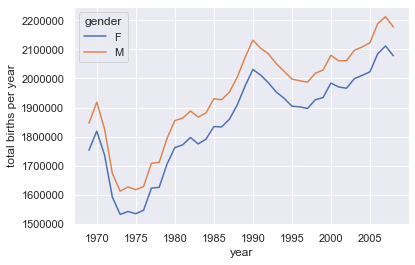

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
birth.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

<b>Further data exploration

 start by cleaning the data a bit, removing outliers caused by mistyped
dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove
these all at once is to cut outliers; we’ll do this via a robust sigma-clipping operation:

In [183]:
quartiles = np.percentile(birth['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

C:\Users\Ishan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [184]:
 births.index = pd.to_datetime(10000 * births.year +
 100 * births.month +
 births.day, format='%Y%m%d')
 births['dayofweek'] = births.index.dayofweek

C:\Users\Ishan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'mean births by day')

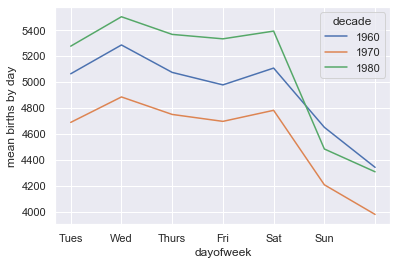

In [185]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
 columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [187]:
births_by_date = births.pivot_table('births',
 [births.index.month, births.index.day])
births_by_date.head()


births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [188]:
births_by_date.index = [pd.datetime(2012, month, day)
 for (month, day) in births_by_date.index]
births_by_date.head()


C:\Users\Ishan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


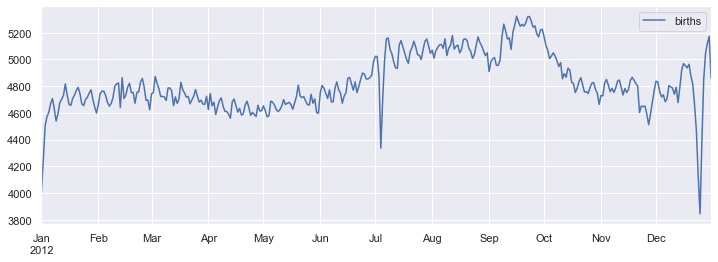

In [189]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Vectorized String Operations

In [191]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
names = pd.Series(data)

In [194]:
names.str.capitalize()


0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

# Tables of Pandas String Methods

In [195]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
 'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [201]:
print(monte.str.lower())
print("--------------------------------")
print(monte.str.upper())
print("--------------------------------")
print(monte.str.isupper())
print("--------------------------------")
print(monte.str.len())
print("--------------------------------")
print(monte.str.startswith('T'))
print("--------------------------------")
print(monte.str.split())
print("--------------------------------")


0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object
--------------------------------
0    GRAHAM CHAPMAN
1       JOHN CLEESE
2     TERRY GILLIAM
3         ERIC IDLE
4       TERRY JONES
5     MICHAEL PALIN
dtype: object
--------------------------------
0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool
--------------------------------
0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64
--------------------------------
0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool
--------------------------------
0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object
--------------------------------


<b>Vectorized item access and slicing

In [202]:
monte.str.split().str.get(-1)


0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

<b>Indicator variables

In [203]:
full_monte = pd.DataFrame({'name': monte,
 'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
 'B|C|D']})
full_monte['info'].str.get_dummies('|')


,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Working with Time Series


<b>Dates and Times in Python


In [205]:
from datetime import datetime
datetime(year=2099,day=9,month=12)

datetime.datetime(2099, 12, 9, 0, 0)

In [208]:
from dateutil import parser
date=parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [211]:
#using Numpy
date = np.array('2015-07-10', dtype=np.datetime64)
date


array('2015-07-10', dtype='datetime64[D]')

In [212]:
date + np.arange(12)

array(['2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
       '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
       '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21'],
      dtype='datetime64[D]')

In [213]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

<b>Dates and times in Pandas: Best of both worlds

In [214]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [217]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

<b>Indexing by pandas datetime

In [5]:
index=pd.to_datetime(["27-08-1999","27-08-2099","27-08-1929","27-09-1999"])
a=pd.Series([1,2,3,4],index=index)
a

1999-08-27    1
2099-08-27    2
1929-08-27    3
1999-09-27    4
dtype: int64

In [7]:
#There are additional special date-only indexing operations,passing a year to obtain a slice of all data from that year:
a["1929"]

1929-08-27    3
dtype: int64

<b>Pandas Time Series Data Structures


• For time stamps, Pandas provides the Timestamp type. As mentioned before, it is
essentially a replacement for Python’s native datetime, but is based on the more
efficient numpy.datetime64 data type. The associated index structure is
DatetimeIndex.<br/><br/>
• For time periods, Pandas provides the Period type. This encodes a fixedfrequency interval based on numpy.datetime64. The associated index structure is
PeriodIndex.<br/><br/>
• For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a
more efficient replacement for Python’s native datetime.timedelta type, and is
based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

In [11]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
 '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [12]:
#timeindex
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

<b>Regular sequences: pd.date_range()


In [13]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [18]:
#Alternatively,the date range can be specified not with a start- and endpoint, but with a startpoint and a number of periods
pd.date_range("2017-08-03",periods=8)

DatetimeIndex(['2017-08-03', '2017-08-04', '2017-08-05', '2017-08-06',
               '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10'],
              dtype='datetime64[ns]', freq='D')

You can modify the spacing by altering the freq argument, which defaults to D. For
example, here we will construct a range of hourly timestamps:

In [19]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [21]:
#time_delta
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

# Frequencies and Offsets

In [27]:
key=pd.DataFrame({"code":["D","W","M","Q","A","H","T","S","L","U","N"],"Description":["Calender Day","Weekly","Month End","Quater End","Year End","Hours","Minutes","Seconds","milliseconds","micro seconds","nano seconds"]})
key

,code,Description
0,D,Calender Day
1,W,Weekly
2,M,Month End
3,Q,Quater End
4,A,Year End
5,H,Hours
6,T,Minutes
7,S,Seconds
8,L,milliseconds
9,U,micro seconds


The monthly, quarterly, and annual frequencies are all marked at the end of the speci‐
fied period. Adding an S suffix to any of these marks it instead at the beginning<br/><br/>
Eg:MS,BMS,QS

On top of this, codes can be combined with numbers to specify other frequencies. For
example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and
minute (T) codes as follows:

In [3]:
pd.date_range("2017-08-28",periods=24,freq="2H3D")

DatetimeIndex(['2017-08-28 00:00:00', '2017-08-31 02:00:00',
               '2017-09-03 04:00:00', '2017-09-06 06:00:00',
               '2017-09-09 08:00:00', '2017-09-12 10:00:00',
               '2017-09-15 12:00:00', '2017-09-18 14:00:00',
               '2017-09-21 16:00:00', '2017-09-24 18:00:00',
               '2017-09-27 20:00:00', '2017-09-30 22:00:00',
               '2017-10-04 00:00:00', '2017-10-07 02:00:00',
               '2017-10-10 04:00:00', '2017-10-13 06:00:00',
               '2017-10-16 08:00:00', '2017-10-19 10:00:00',
               '2017-10-22 12:00:00', '2017-10-25 14:00:00',
               '2017-10-28 16:00:00', '2017-10-31 18:00:00',
               '2017-11-03 20:00:00', '2017-11-06 22:00:00'],
              dtype='datetime64[ns]', freq='74H')

# Resampling, Shifting, and Windowing

In [47]:
from pandas_datareader import data

In [48]:
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


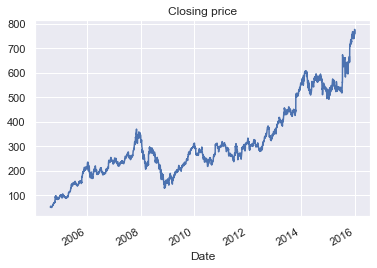

Text(0.5, 1.0, 'Opening price')

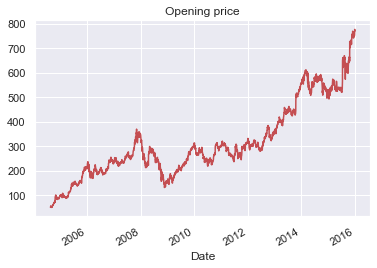

In [49]:
goog["Close"].plot()
plt.title("Closing price")
plt.show()
goog["Open"].plot(c="r")
plt.title("Opening price")

<b>Resampling and converting frequencies</b>

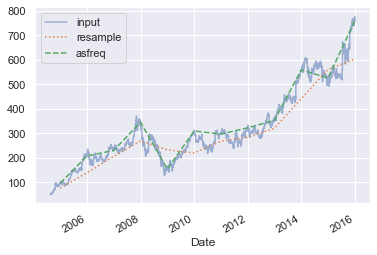

In [23]:
goog["Close"].plot(alpha=0.5, style='-')
goog["Close"].resample('BA').mean().plot(style=':')
goog["Close"].asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')

 resample reports the average of the previous year,
while asfreq reports the value at the end of the year.

<b>Some values for days are missing, so we will have to impute the data

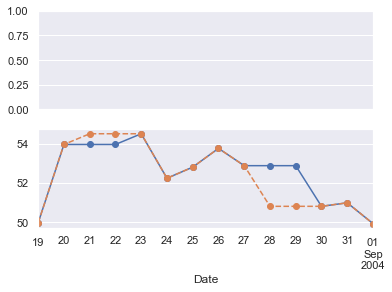

In [29]:
fig,ax=plt.subplots(2,sharex=True)
data=goog["Close"][:10]
data.asfreq("D",method="ffill").plot(ax=ax[1],style="-o")
data.asfreq("D",method="bfill").plot(ax=ax[1],style="--o")

In [ ]:
<b>Time-shifts

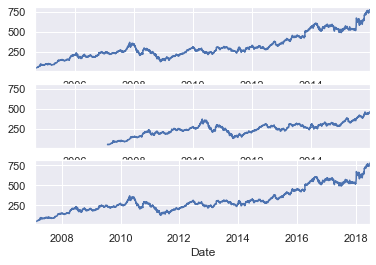

In [43]:
 fig, ax = plt.subplots(3, sharey=True)
 # apply a frequency to the data
 goog = goog["Close"].asfreq('D', method='pad')
 goog.plot(ax=ax[0])
 goog.shift(900).plot(ax=ax[1])
 goog.tshift(900).plot(ax=ax[2])

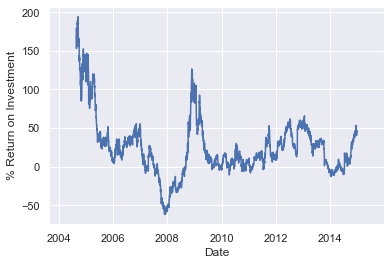

In [44]:
 #calculaing ROI
 ROI = 100 * (goog.tshift(-365) / goog - 1)
 ROI.plot()
 plt.ylabel('% Return on Investment');

<b>Rolling

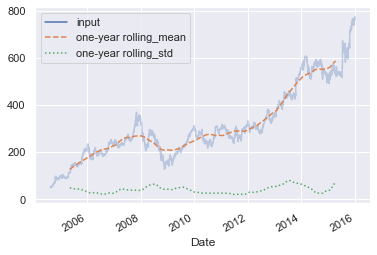

In [53]:
rolling = goog["Close"].rolling(365, center=True)
goog=goog["Close"]
data = pd.DataFrame({'input': goog,
 'one-year rolling_mean': rolling.mean(),
 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


# Example: Visualizing Seattle Bicycle Counts


In [64]:
data=pd.read_csv(r"C:\Users\Ishan\Documents\Python Scripts\Datasets\Fremont_Bridge_Bicycle_Counter.csv",index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [67]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,134105.000000,134105.000000,134105.000000
mean,113.085262,51.613482,61.471780
std,144.184329,66.510698,89.811273
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


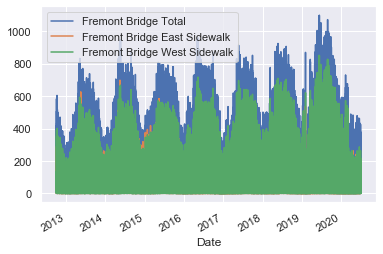

In [68]:
data.plot()

This graph is too dense, lets resample

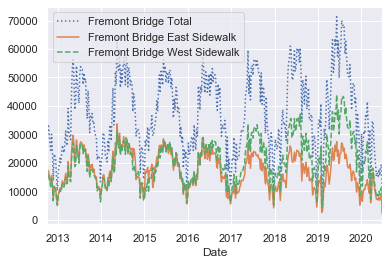

In [72]:
weekly=data.resample("W").sum()
weekly.plot(style=[":","-","--"])

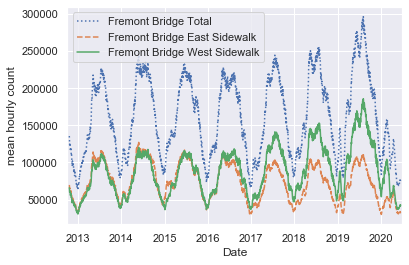

In [73]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window. We can get a
smoother version of a rolling mean using a window function—for example, a Gaus‐
sian window. The following code (visualized in Figure 3-14) specifies both the width
of the window (we chose 50 days) and the width of the Gaussian within the window
(we chose 10 days)

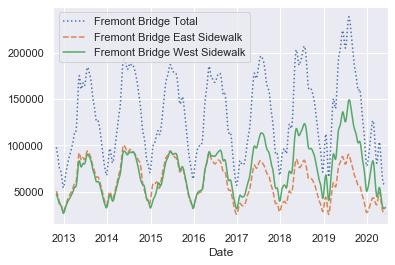

In [74]:
daily.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

<b>Digging into the data

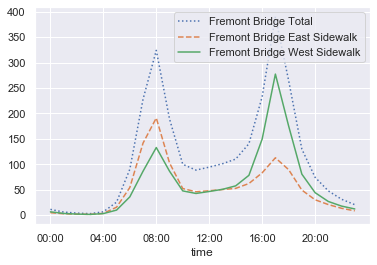

In [75]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the
morning and 5:00 in the evening. This is likely evidence of a strong component of
commuter traffic crossing the bridge. This is further evidenced by the differences
between the western sidewalk (generally used going toward downtown Seattle),
which peaks more strongly in the morning, and the eastern sidewalk (generally used
going away from downtown Seattle), which peaks more strongly in the evening.

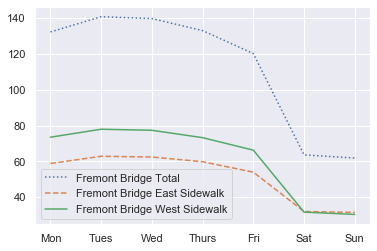

In [76]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

# High-Performance Pandas: eval() and query()

<b>pandas.eval() for Efficient Operations

In [80]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
for i in range(4))
%timeit df1 + df2 + df3 + df4

144 ms ± 7.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [81]:
%timeit pd.eval('df1 + df2 + df3 + df4')

73.5 ms ± 6.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# <b>Operations supported by pd.eval()

<b>Arithmetic operators

In [82]:
pd.eval('-df1 * df2 / (df3 + df4) - df1')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.674994,-1.351543,-1.820883,-0.916032,-0.256042,-0.372522,-0.068752,-1.270669,-0.914795,-0.711002,...,-0.157672,-2.032290,-1.294548,-0.601707,-1.176899,-1.367254,-0.697413,-0.429486,-0.050991,-0.145701
1,-0.050411,-2.210637,-0.636951,-1.307417,-1.635451,-0.472821,-0.414749,-0.795118,-0.297504,-0.088878,...,-0.145471,-1.340509,-1.131479,-1.028794,-0.519974,-0.446386,-1.090149,-1.115548,-1.231687,-1.165866
2,-1.108256,-0.087932,-0.176056,-1.181883,-0.898892,-0.014828,-0.196666,-0.840537,-0.022494,-0.247204,...,-0.033365,-0.055083,-1.147093,-0.624679,-0.166329,-1.856632,-0.861839,-0.330386,-0.708346,-0.156137
3,-0.072800,-1.089013,-0.821247,-1.110994,-1.089896,-1.181725,-0.541536,-0.553951,-0.948037,-0.280296,...,-1.319519,-0.557055,-1.141532,-0.835402,-0.631641,-2.824596,-1.421997,-0.704922,-0.962355,-1.367111
4,-0.495203,-2.596270,-0.830580,-1.168805,-0.520282,-1.195666,-1.017578,-0.021369,-1.447333,-0.150500,...,-0.588598,-1.093118,-0.393621,-0.241149,-0.761716,-0.824995,-1.146234,-0.172121,-1.751816,-1.757929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.149589,-0.846992,-0.287973,-0.643146,-0.770273,-1.489959,-0.622893,-0.935196,-1.012931,-0.867074,...,-0.190344,-0.528766,-0.062067,-0.752491,-0.792590,-0.490462,-0.038555,-0.821485,-1.318325,-1.800947
99996,-0.492707,-0.018034,-0.670375,-0.852421,-0.463637,-0.610485,-1.735585,-0.660537,-3.083400,-0.048383,...,-0.128653,-2.328715,-0.663279,-0.154108,-0.284394,-0.915559,-0.462034,-0.633915,-0.744137,-0.337732
99997,-1.059112,-0.816292,-0.048266,-0.631990,-0.067207,-0.395466,-1.315821,-0.639417,-0.522212,-1.403247,...,-1.215115,-0.847788,-1.247868,-0.723853,-0.427958,-0.186909,-1.922528,-0.212249,-0.457585,-0.989032
99998,-1.405732,-0.101731,-0.855033,-0.287214,-0.106198,-0.021966,-1.200190,-1.304204,-0.297947,-1.927215,...,-0.300303,-1.493114,-0.503951,-1.300583,-1.576097,-1.441492,-0.200053,-0.321247,-2.443995,-0.329023


<b>Comparison operators

In [83]:
pd.eval('df1 < df2 <= df3 != df4')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,False,False,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,True,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
99996,False,False,True,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
99997,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
99998,False,True,True,False,False,True,False,False,False,False,...,False,False,True,True,False,False,True,False,False,False


<b>Bitwise operators

In [84]:
pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,False,False,False,True,True,True,True,True,True,...,True,False,False,False,True,False,True,True,True,True
1,True,True,True,False,False,True,True,True,True,True,...,True,False,True,False,True,False,True,False,False,False
2,True,True,True,True,True,False,False,False,True,False,...,True,True,True,True,False,False,False,True,True,False
3,True,False,True,True,True,False,True,False,True,True,...,False,False,True,False,True,False,True,True,True,False
4,True,False,True,False,False,False,True,True,False,True,...,True,True,True,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,True,False,False,False,False,...,True,True,True,False,True,True,True,False,True,False
99996,True,True,True,False,True,True,False,True,False,True,...,False,True,True,True,True,True,False,True,False,True
99997,False,True,True,False,False,True,True,True,True,False,...,True,False,False,True,True,True,True,True,True,True
99998,True,True,True,False,False,True,False,False,True,False,...,True,False,False,False,True,True,True,True,True,True


# DataFrame.eval() for Column-Wise Operations

In [4]:
df = pd.DataFrame(np.random.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.604836,0.691795,0.706745
1,0.058999,0.282675,0.215693
2,0.174331,0.867996,0.334561
3,0.895132,0.934072,0.377537
4,0.811809,0.538297,0.296104


In [5]:
pd.eval("(df.A + df.B) / (df.C - 1)")


0     -4.421508
1     -0.435638
2     -1.566375
3     -2.938658
4     -1.918048
         ...   
995   -2.236927
996   -1.531643
997   -0.827260
998   -9.840662
999   -1.148874
Length: 1000, dtype: float64

 DataFrame.eval() method allows much more succinct evaluation of expressions
with the columns

In [6]:
df.eval('(A + B) / (C - 1)')

0     -4.421508
1     -0.435638
2     -1.566375
3     -2.938658
4     -1.918048
         ...   
995   -2.236927
996   -1.531643
997   -0.827260
998   -9.840662
999   -1.148874
Length: 1000, dtype: float64

<b>Assignment in DataFrame.eval()

In [7]:
df.eval('D=(A + B) / (C - 1)',inplace=True)
df

,A,B,C,D
0,0.604836,0.691795,0.706745,-4.421508
1,0.058999,0.282675,0.215693,-0.435638
2,0.174331,0.867996,0.334561,-1.566375
3,0.895132,0.934072,0.377537,-2.938658
4,0.811809,0.538297,0.296104,-1.918048
...,...,...,...,...
995,0.799356,0.731124,0.315811,-2.236927
996,0.292944,0.624332,0.401116,-1.531643
997,0.301556,0.411584,0.137949,-0.827260
998,0.028899,0.625507,0.933500,-9.840662


<b>Local variables in DataFrame.eval()

In [92]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

 @ character here marks a variable name rather than a column name, and lets you
efficiently evaluate expressions involving the two “namespaces”: the namespace of
columns, and the namespace of Python objects. Notice that this @ character is only
supported by the DataFrame.eval() method, not by the pandas.eval() function,
because the pandas.eval() function only has access to the one (Python) namespace.

# DataFrame.query() Method


In [93]:
df.query('A < 0.5 and B < 0.5')

,A,B,C,D
2,0.243301,0.413989,0.010915,-0.664543
3,0.269623,0.133336,0.341891,-0.612299
10,0.294168,0.209409,0.765710,-2.149372
15,0.067612,0.118012,0.121566,-0.211312
17,0.020577,0.152552,0.079515,-0.188084
...,...,...,...,...
981,0.070671,0.477425,0.592852,-1.346185
986,0.186414,0.445618,0.665419,-1.889025
989,0.015667,0.108309,0.445396,-0.223541
990,0.063793,0.182106,0.699674,-0.818773


<b>Also accepts python local variables

In [94]:
 Cmean = df['C'].mean()
 result1 = df[(df.A < Cmean) & (df.B < Cmean)]
 result2 = df.query('A < @Cmean and B < @Cmean')
 np.allclose(result1, result2)

True

# Performance: When to Use These Functions

If the size of the temporary DataFrames is significant compared to your available sys‐
tem memory (typically several gigabytes), then it’s a good idea to use an eval() or
query() expression. You can check the approximate size of your array in bytes using
this:


In [8]:
 df.values.nbytes

32000